### Output

In [68]:
from detecto.core import Model
from detecto.visualize import detect_video

model = Model()  # Initialize a pre-trained model
detect_video(model, 'input_video.mp4', 'output.avi')

### training model

In [69]:
# from detecto.core import Model, Dataset

# dataset = Dataset('custom_dataset/')  # Load images and label data from the custom_dataset/ folder

# model = Model(['dog', 'cat', 'rabbit'])  # Train to predict dogs, cats, and rabbits
# model.fit(dataset)

# model.predict(...) 

### testing reading image

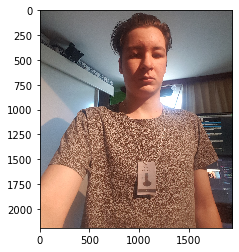

In [70]:
import matplotlib.pyplot as plt
from detecto.utils import read_image

image = read_image('images/20200530_120113R.jpg')
plt.imshow(image)
plt.show()

### creating dataset object for Detecto

In [71]:
from detecto.core import Dataset


# If your images and labels are in separate folders
dataset = Dataset('images/train', 'images')
dataset[0]

(tensor([[[-0.6109, -0.6965, -0.7822,  ..., -0.4911, -0.4911, -0.4739],
          [-0.5596, -0.6109, -0.6623,  ..., -0.4054, -0.4397, -0.5253],
          [-0.5938, -0.6109, -0.6281,  ..., -0.4397, -0.4397, -0.4739],
          ...,
          [ 1.9578,  2.0092,  1.9578,  ..., -1.1075, -1.0562, -1.0219],
          [ 1.9749,  2.0263,  1.9407,  ..., -1.1418, -1.0562, -0.9877],
          [ 1.9407,  2.0605,  1.9578,  ..., -1.1932, -1.1075, -1.0390]],
 
         [[-0.4601, -0.5476, -0.6352,  ..., -0.3375, -0.3375, -0.3200],
          [-0.4076, -0.4601, -0.5126,  ..., -0.2500, -0.2850, -0.3725],
          [-0.4426, -0.4601, -0.4776,  ..., -0.2850, -0.2850, -0.3200],
          ...,
          [ 1.0105,  1.0630,  1.0105,  ..., -1.0728, -1.0203, -0.9853],
          [ 1.0280,  1.0805,  0.9930,  ..., -1.1078, -1.0203, -0.9503],
          [ 0.9930,  1.1155,  1.0105,  ..., -1.1604, -1.0728, -1.0028]],
 
         [[-0.3230, -0.4101, -0.4973,  ..., -0.1312, -0.1312, -0.1138],
          [-0.2707, -0.3230,

### Image Augmentation

In [72]:
from torchvision import transforms
from detecto.utils import normalize_transform

custom_transforms = transforms.Compose([
    transforms.ToPILImage(),
    # Note: all images with a size smaller than 800 will be scaled up in size
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(saturation=0.2),
    transforms.ToTensor(),  # required
    normalize_transform(),  # required
])
dataset = Dataset('images/train','images', transform=custom_transforms)


### check dataset

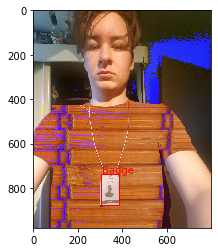

In [73]:
from detecto.visualize import show_labeled_image

image, targets = dataset[80]
show_labeled_image(image, targets['boxes'], targets['labels'])

### Train model on dataset

In [74]:
from detecto.core import DataLoader, Model

# Specify all unique labels you're trying to predict
your_labels = ['Badge', 'ML6 logo']
model = Model(your_labels)

model.fit(dataset, verbose=True)

# Alternatively, provide your own DataLoader to the fit method
loader = DataLoader(dataset, batch_size=2, shuffle=True)
model.fit(loader, verbose=True)

Epoch 1 of 10
Epoch 2 of 10
Epoch 3 of 10
Epoch 4 of 10
Epoch 5 of 10
Epoch 6 of 10
Epoch 7 of 10
Epoch 8 of 10
Epoch 9 of 10
Epoch 10 of 10
Epoch 1 of 10
Epoch 2 of 10
Epoch 3 of 10
Epoch 4 of 10
Epoch 5 of 10
Epoch 6 of 10
Epoch 7 of 10
Epoch 8 of 10
Epoch 9 of 10
Epoch 10 of 10


Epoch 1 of 15


C:\Users\jens\AppData\Roaming\Python\Python37\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Loss: 0.0661550322547555
Epoch 2 of 15
Loss: 0.056541393883526324
Epoch 3 of 15
Loss: 0.05475767906755209
Epoch 4 of 15
Loss: 0.05476124286651611
Epoch 5 of 15
Loss: 0.053582831658422946
Epoch 6 of 15
Loss: 0.04633270944468677
Epoch 7 of 15
Loss: 0.048143071588128805
Epoch 8 of 15
Loss: 0.05010336032137275
Epoch 9 of 15
Loss: 0.04893250870518386
Epoch 10 of 15
Loss: 0.049171088449656966
Epoch 11 of 15
Loss: 0.050413156673312184
Epoch 12 of 15
Loss: 0.04823902091011405
Epoch 13 of 15
Loss: 0.0491835453081876
Epoch 14 of 15
Loss: 0.04943284359760582
Epoch 15 of 15
Loss: 0.04817202310077846


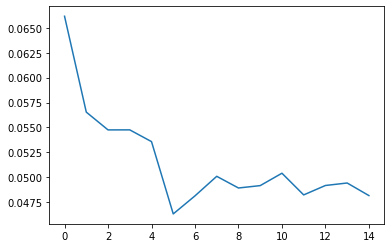

In [62]:
val_dataset = Dataset('images/test','images')
losses = model.fit(dataset, val_dataset, epochs=15, learning_rate=0.01,
                   gamma=0.2, lr_step_size=5, verbose=True)

plt.plot(losses)
plt.show()

### validate image 

In [63]:
image = read_image('testImage.jpg')
predictions = model.predict(image)

images = []
# for i in range(4):
#     image, _ = val_dataset[i]
images.append(image)

top_predictions = model.predict_top(images)

print(predictions)
print(top_predictions)

C:\Users\jens\AppData\Roaming\Python\Python37\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


(['ML6 logo', 'Badge'], tensor([[ 942.8414, 2065.2014, 1155.8712, 2109.9260],
        [ 935.0828, 1778.0948, 1157.2085, 2141.1460]]), tensor([0.8933, 0.8619]))
[(['ML6 logo', 'Badge'], tensor([[ 942.8414, 2065.2014, 1155.8712, 2109.9260],
        [ 935.0828, 1778.0948, 1157.2085, 2141.1460]]), tensor([0.8933, 0.8619]))]


### Run test

### load model and live tryout

In [78]:
from detecto.core import DataLoader, Model
from detecto.visualize import plot_prediction_grid, detect_video, detect_live
labels = ['Badge', 'ML6 logo']
model = Model.load('badgeDetectionV2.1.pth', labels)
detect_live(model, score_filter=0.7) 

KeyboardInterrupt: 